In [2]:
import cv2
import numpy as np
import glob
import sys
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Report - Assignment 0
### Rollno - 20171035
### Name - Pulkit Gera

This is the report for assignment 0. All codes are found in the file along with the input 2 videos and final outputs. Also included are some intermediate outputs. The codes for different sections are within functions with the same filename and how to run them is also included accordingly. 

## Capturing Videos + Webcam

In [3]:
def vid_extract(input_video,output_directory):
    mypath = input_video
    webcam =0
    if not os.path.exists(mypath):
        if int(mypath) == 1:
            webcam =1
        else:
            print("No such file")
            exit()
    outputdir = output_directory
    if not os.path.exists(outputdir):
        os.makedirs(outputdir)

    i=0
    if webcam == 1:
        cap= cv2.VideoCapture(int(mypath))
        while True:

            ret, frame = cap.read()
            frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
            cv2.imshow('Input', frame)
            cv2.imwrite(outputdir+'/frame'+str(i)+'.jpg',frame)
            i+=1
            c = cv2.waitKey(1)
            if c == 27:
                break

        cap.release()
        cv2.destroyAllWindows()
    else:
        cap= cv2.VideoCapture(mypath)
        while(cap.isOpened()):
            try:
                ret, frame = cap.read()
                if ret == False:
                    break
                cv2.imwrite(outputdir+'/frame'+str(i)+'.jpg',frame)
                i+=1
            except AttributeError as e:
                print("End of video")
 

To capture videos `python vid_extract <input_vid_name> <output_directory>`. If you want to capture from the webcam, in place of input_vid_name, type 1(in my laptop it works with 1 otherwise 0).

(-0.5, 639.5, 479.5, -0.5)

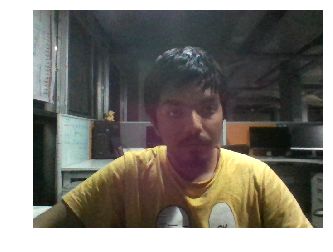

In [6]:
img = cv2.imread('webcam.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

## Converting frames to videos

In [7]:
def make_vid(input_dir_name,name_of_vid,frame):
    mypath = input_dir_name
    if not os.path.exists(mypath):
        print("No such file")
        exit()
    output = name_of_vid
    img_array = []
    for l in range(len(os.listdir(mypath))):
        k = mypath+'/frame'+str(l)+'.jpg'
        img = cv2.imread(k)
        name.append(k)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
    fourcc = cv2.VideoWriter_fourcc(*'MPEG')
    out = cv2.VideoWriter(output,fourcc, frame, size)
    for img in img_array:
        out.write(img)
    out.release()

To convert frames to video `python make_vid <input_dir_name> <name_of_vid> <no_of_fps>`. Note it assumes, files in the directory are of the form `frame#.jpg`.

# Chroma Key

In [8]:
def compost(fg_video,bg_video,outputdir):
    if not os.path.exists(fg_video):
        print("No such file")
        exit()
    if not os.path.exists(bg_video):
        print("No such file")
        exit()
    if not os.path.exists(outputdir):
        os.makedirs(outputdir)
    count=0
    for k in tqdm(range(20,116)):
        fg = cv2.imread(fg_video+'/frame'+str(k)+'.jpg')
        bg = cv2.imread(bg_video+'/frame'+str(k)+'.jpg')
        h,w,c = bg.shape
        fg = cv2.resize(fg, (w,h), interpolation = cv2.INTER_AREA)
        green = fg[:,:,1]
        mask = (green<35)|(np.amax(fg,axis=2)!=green)
        new_img = np.zeros(bg.shape)

        for i in range(h):
            for j in range(w):
                    if np.all(mask[i,j] * bg[i,j,:] == np.array([0,0,0])):
                        new_img[i,j,:] = bg[i,j,:]
                    else:
                        new_img[i,j,:] = fg[i,j,:]
        new_img = new_img.astype('uint8')
        cv2.imwrite(outputdir+'/frame'+str(count)+'.jpg',new_img)
        count +=1

To run type `python compost.py <foreground_video_frame_directory> <background_video_frame_directory> <output_dir>`. It assumes same number of frames for both the videos. The results of the experiment are in the file `merged.mp4`.

(-0.5, 639.5, 351.5, -0.5)

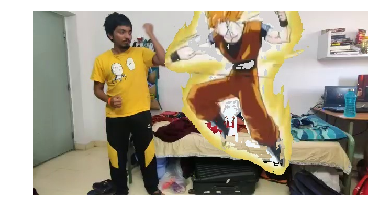

In [9]:
img = cv2.imread('merge.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')